# 机器学习考试成绩分析

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 200)

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [2]:
scores = pd.read_excel('分数分析_脱敏.xlsx')

scores['及格'] = (scores['综合'] >= 60).map(int)

xiaoqi = scores[scores['班级'] == '校企']
putong = scores[scores['班级'] == '普本']

# 成绩分布

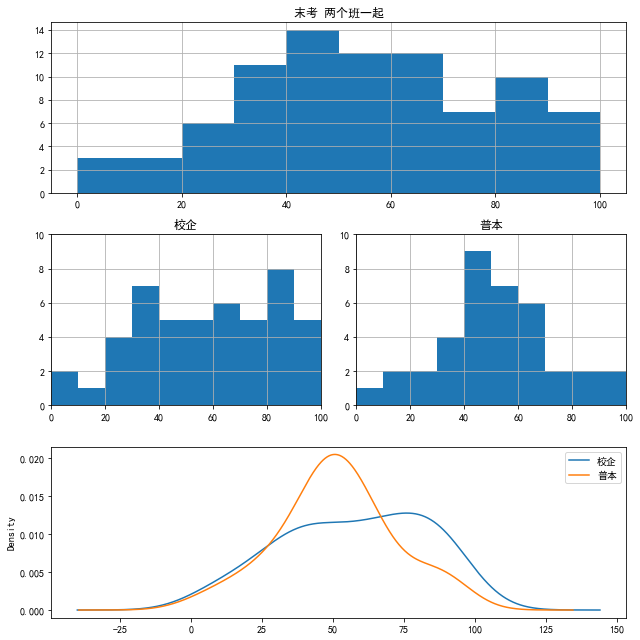

In [3]:
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
# 成绩分布图 末考
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(311)
ax.hist(scores['末考'], bins)
ax.set_title(f'末考 两个班一起')
ax.grid()

ax = fig.add_subplot(323)
ax.hist(xiaoqi['末考'], bins)
ax.set_title(f'校企')
ax.set_ylim(0, 10)
ax.set_xlim(0, 100)
ax.grid()

ax = fig.add_subplot(324)
ax.hist(putong['末考'], bins)
ax.set_title(f'普本')
ax.set_ylim(0, 10)
ax.set_xlim(0, 100)
ax.grid()

ax = fig.add_subplot(313)
kde = xiaoqi[['末考']]
kde.columns = ['校企']
kde.plot(kind='kde', ax=ax)
kde = putong[['末考']]
kde.columns = ['普本']
kde.plot(kind='kde', ax=ax)

plt.tight_layout()
plt.savefig('末考')


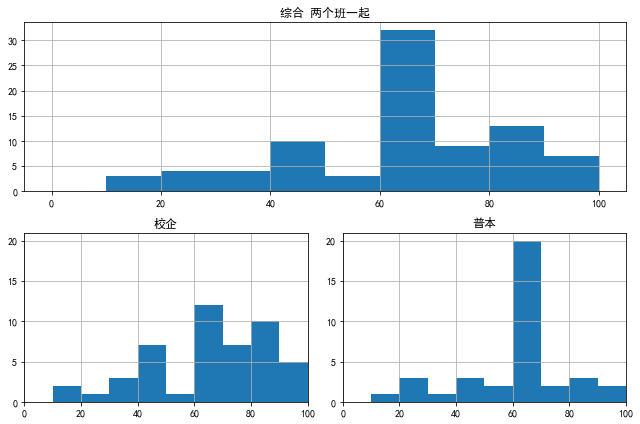

In [4]:
# 成绩分布图 综合
fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(211)
ax.hist(scores['综合'], bins)
ax.set_title(f'综合 两个班一起')
ax.grid()
ax = fig.add_subplot(223)
ax.hist(xiaoqi['综合'], bins)
ax.set_title(f'校企')
ax.set_ylim(0, 21)
ax.set_xlim(0, 100)
ax.set_yticks([0, 5, 10, 15, 20])
ax.grid()
ax = fig.add_subplot(224)
ax.hist(putong['综合'], bins)
ax.set_title(f'普本')
ax.set_ylim(0, 21)
ax.set_xlim(0, 100)
ax.set_yticks([0, 5, 10, 15, 20])
ax.grid()
plt.tight_layout()
plt.savefig('综合')

# 分段占比

In [5]:
# 分段统计
bins = [0, 60, 70, 80, 90, 100]
labels = ['不及格', '及格', '中等', '良好', '优秀']

# 两个班
all_level = pd.DataFrame()
all_level['末考'] = pd.cut(scores['末考'], bins, False, labels).value_counts()
all_level['综合'] = pd.cut(scores['综合'], bins, False, labels).value_counts()

all_level.index.name = '分段'
all_level.columns.name = '成绩'
all_level.reset_index(inplace=True)
all_level = all_level.melt(id_vars='分段', var_name='考试', value_name='成绩')
all_level.set_index(['分段', '考试'], inplace=True)
all_level.sort_index(inplace=True)
all_level['比例'] = all_level['成绩'] / scores.shape[0]
all_level = all_level.T

# 普本
putong_level = pd.DataFrame()
putong_level['末考'] = pd.cut(putong['末考'], bins, False, labels).value_counts()
putong_level['综合'] = pd.cut(putong['综合'], bins, False, labels).value_counts()

putong_level.index.name = '分段'
putong_level.columns.name = '成绩'
putong_level.reset_index(inplace=True)
putong_level = putong_level.melt(id_vars='分段', var_name='考试', value_name='成绩')
putong_level.set_index(['分段', '考试'], inplace=True)
putong_level.sort_index(inplace=True)
putong_level['比例'] = putong_level['成绩'] / putong.shape[0]
putong_level = putong_level.T

# 校企
xiaoqi_level = pd.DataFrame()
xiaoqi_level['末考'] = pd.cut(xiaoqi['末考'], bins, False, labels).value_counts()
xiaoqi_level['综合'] = pd.cut(xiaoqi['综合'], bins, False, labels).value_counts()

xiaoqi_level.index.name = '分段'
xiaoqi_level.columns.name = '成绩'
xiaoqi_level.reset_index(inplace=True)
xiaoqi_level = xiaoqi_level.melt(id_vars='分段', var_name='考试', value_name='成绩')
xiaoqi_level.set_index(['分段', '考试'], inplace=True)
xiaoqi_level.sort_index(inplace=True)
xiaoqi_level['比例'] = xiaoqi_level['成绩'] / xiaoqi.shape[0]
xiaoqi_level = xiaoqi_level.T

In [6]:
all_level  # 全体分段分布

分段        不及格                    及格                   中等                   良好                   优秀          
考试         末考         综合         末考         综合        末考        综合         末考         综合        末考        综合
成绩  49.000000  24.000000  12.000000  32.000000  7.000000  9.000000  10.000000  13.000000  7.000000  7.000000
比例   0.576471   0.282353   0.141176   0.376471  0.082353  0.105882   0.117647   0.152941  0.082353  0.082353

In [7]:
xiaoqi_level  # 校企班分段分布

分段   不及格                及格               中等                  良好                   优秀          
考试    末考         综合     末考     综合        末考        综合        末考         综合        末考        综合
成绩  24.0  14.000000  6.000  12.00  5.000000  7.000000  8.000000  10.000000  5.000000  5.000000
比例   0.5   0.291667  0.125   0.25  0.104167  0.145833  0.166667   0.208333  0.104167  0.104167

In [8]:
putong_level  # 普本班分段分布

分段        不及格                  及格                   中等                  良好                  优秀          
考试         末考        综合        末考         综合        末考        综合        末考        综合        末考        综合
成绩  25.000000  10.00000  6.000000  20.000000  2.000000  2.000000  2.000000  3.000000  2.000000  2.000000
比例   0.675676   0.27027  0.162162   0.540541  0.054054  0.054054  0.054054  0.081081  0.054054  0.054054

# 得分情况

题目	选择	简答	代码	计算	算法

分值	20	20	15	25	20

得分	12.292	11.584	8.1337	12.313	11.096

得分比	0.6146	0.5792	0.5422	0.4925	0.5548

难度分配情况比较合理，选择有基础得分，简答好背，计算类题目得分最少。

# 两班对比

In [9]:
xiaoqi[['末考', '综合']].describe()

,末考,综合
count,48.000000,48.000000
mean,57.437500,64.512500
std,25.136992,21.033819
min,6.000000,10.200000
25%,37.500000,48.275000
50%,60.000000,64.800000
75%,80.250000,81.600000
max,98.000000,97.700000


In [10]:
putong[['末考', '综合']].describe()

,末考,综合
count,37.000000,37.000000
mean,51.189189,59.645946
std,20.369964,18.072195
min,4.000000,10.000000
25%,43.000000,51.200000
50%,50.000000,60.600000
75%,62.000000,68.600000
max,91.000000,92.500000


#### 两班对比，校企班末考成绩明显好于普通班
#### 试卷中五道大题分数分布如下：
#### 选择 简答  代码  计算  算法
####    20   20     15      25     20

#### 校企、普本的各题平均分如下
####  12.792    12.604    8.583    11.333    12.125
####  11.514    10.054    7.459    12.784      9.378

#### 较大的差异在于简答和算法，这两道题目都出现在复习材料中
#### 尤其是算法题，背过knn、kmeans、决策树难住了普本的同学
#### 这个也提示学习风气的问题
#### 在综合成绩落后6分的情况下，普本同学计算题仍高过校企同学1.4分
#### 考虑到大家的入学成绩（入学线普本489 校企479），似乎说明“机灵的输给了认真的”

# 男女生情况：

In [11]:
sex = scores[['学号', '性别', '及格']].groupby(['性别', '及格']).count()
sex.reset_index(inplace=True)
sex = sex.pivot('性别', '及格', '学号')
sex['rate'] = sex[0] / sex.sum(1)
sex

及格,0,1,rate
性别,,,
女,6,30,0.166667
男,18,31,0.367347


#### 女生挂科率 1 / 6 远低于男生

#### 机器学习课程本身难度较大，数学、算法类抽象知识要求较高，女生的通过率仍然较高

#### （男女人格平等，但有生理、认知、学习的特点与差异，分析在于因材施教，无意于性别歧视与对立）

####  明显提示相当比例男生没有用心学习。

#### 另一方面，之前校企班的Python课程，只有8位男同学不及格，
#### 相比之下，一定程度体现出男女同学的差异和课程差异。

# 宿舍分析

<Figure size 576x720 with 0 Axes>

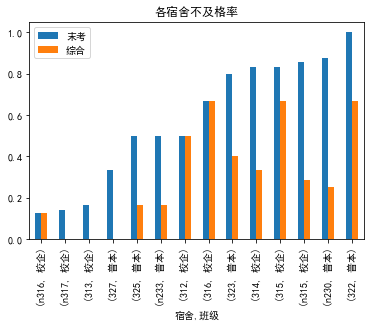

In [12]:
room_s = scores[['学号', '宿舍', '班级', '及格']].groupby(['宿舍', '班级', '及格']).count()
room_s.reset_index(inplace=True)
room_s = room_s.pivot(['宿舍', '班级'], '及格', '学号')
room_s.fillna(0, inplace=True)
room_s['rate'] = room_s[0] / room_s.sum(1)
room_s.sort_values('rate', inplace=True)

scores['末考及格'] = (scores['末考'] >= 60).map(int)
room_e = scores[['学号', '宿舍', '班级', '末考及格']].groupby(['宿舍', '班级', '末考及格']).count()
room_e.reset_index(inplace=True)
room_e = room_e.pivot(['宿舍', '班级'], '末考及格', '学号')
room_e.fillna(0, inplace=True)
room_e['rate'] = room_e[0] / room_e.sum(1)
room_e.sort_values('rate', inplace=True)

room = pd.DataFrame()
room['末考'] = room_e['rate']
room['综合'] = room_s['rate']
room.sort_values(['末考', '综合'], inplace=True)

plt.figure(figsize=(8, 10))
room.plot.bar()
plt.title('各宿舍不及格率')
plt.savefig('各宿舍不及格率')

<Figure size 576x720 with 0 Axes>

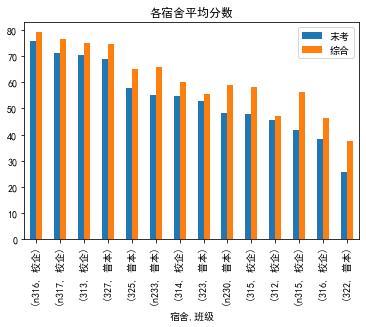

In [13]:
# 各宿舍平均分
room_s = scores[['宿舍', '班级', '综合']].groupby(['宿舍', '班级']).mean()
room_e = scores[['宿舍', '班级', '末考']].groupby(['宿舍', '班级']).mean()
room = pd.DataFrame()
room['末考'] = room_e['末考']
room['综合'] = room_s['综合']
room.sort_values(['末考', '综合'], inplace=True, ascending=False)

plt.figure(figsize=(8, 10))
room.plot.bar()
plt.title('各宿舍平均分数')
plt.savefig('各宿舍平均分数')

#### 315、316、322三个宿舍出现了12位同学不及格，
#### 用全班21%的人数，产生了50%的不及格他们需要外部干预
#### 尤其322宿舍，没有一个能够末考过关……

#### 另外 n230, n315 大多靠日常成绩过关，也需要适当的帮助

#### n316、n317、313、327四个宿舍学风较好

#### 宿舍成绩的差异也构成了两个班成绩的差异

# 及格与模拟面试的相关性

In [14]:
inter = scores[['学号', '模拟面试', '及格']].groupby(['模拟面试', '及格']).count()
inter.reset_index(inplace=True)
inter = inter.pivot('模拟面试', '及格', '学号')
inter['rate'] = inter[0] / inter.sum(1)
inter

及格,0,1,rate
模拟面试,,,
0,14,11,0.560000
1,10,50,0.166667


#### 没交的大半不及格，交了基本及格了